In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (20, 15),
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':20,
         'ytick.labelsize':20}

plt.style.use('ggplot')
    
plt.rcParams.update(params)

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Automobile
data = pd.read_csv('CarPrice_Assignment.csv').dropna()

In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
price = data['price'].values
horsepower = data['horsepower'].values

Text(0, 0.5, 'price')

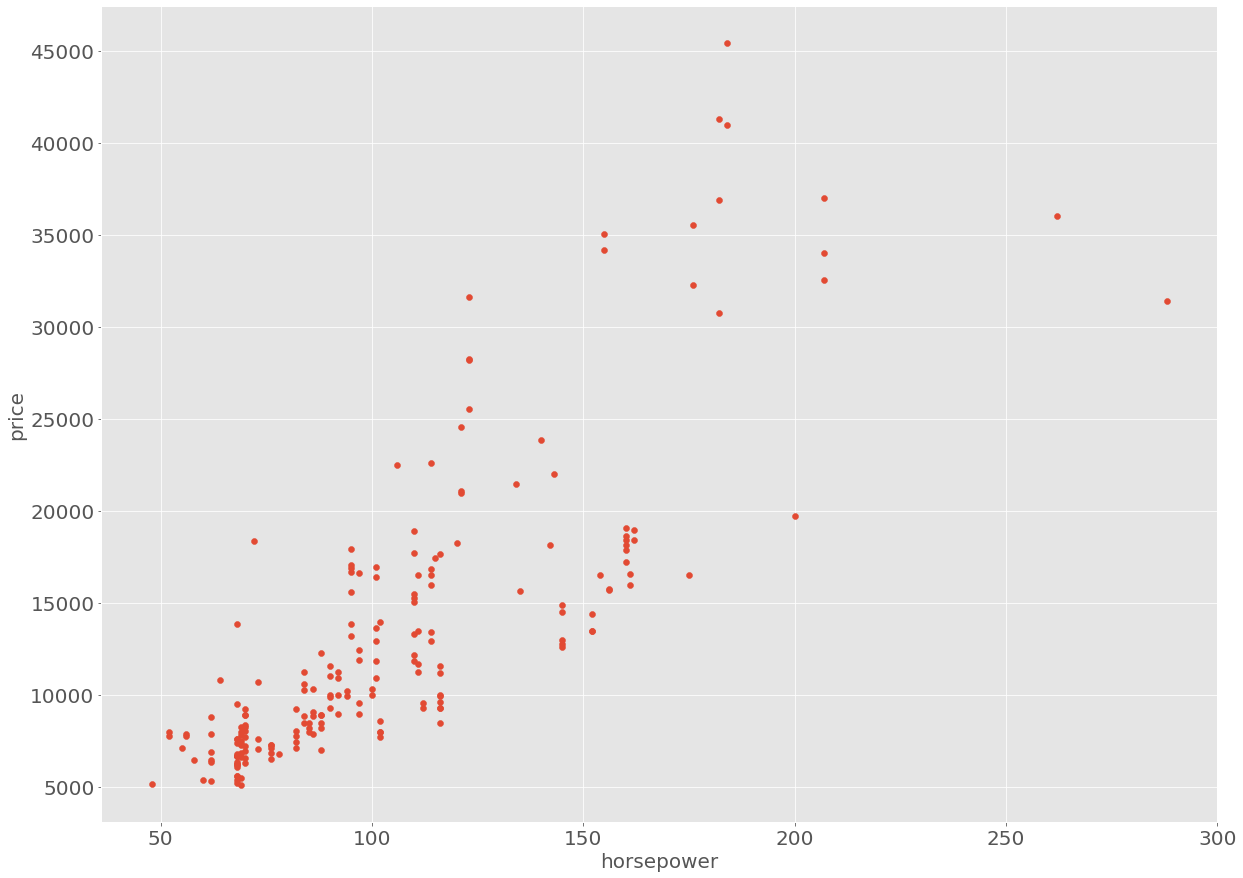

In [6]:
plt.figure()
plt.scatter(horsepower, price)
plt.xlabel('horsepower')
plt.ylabel('price')

Text(0, 0.5, 'log(price)')

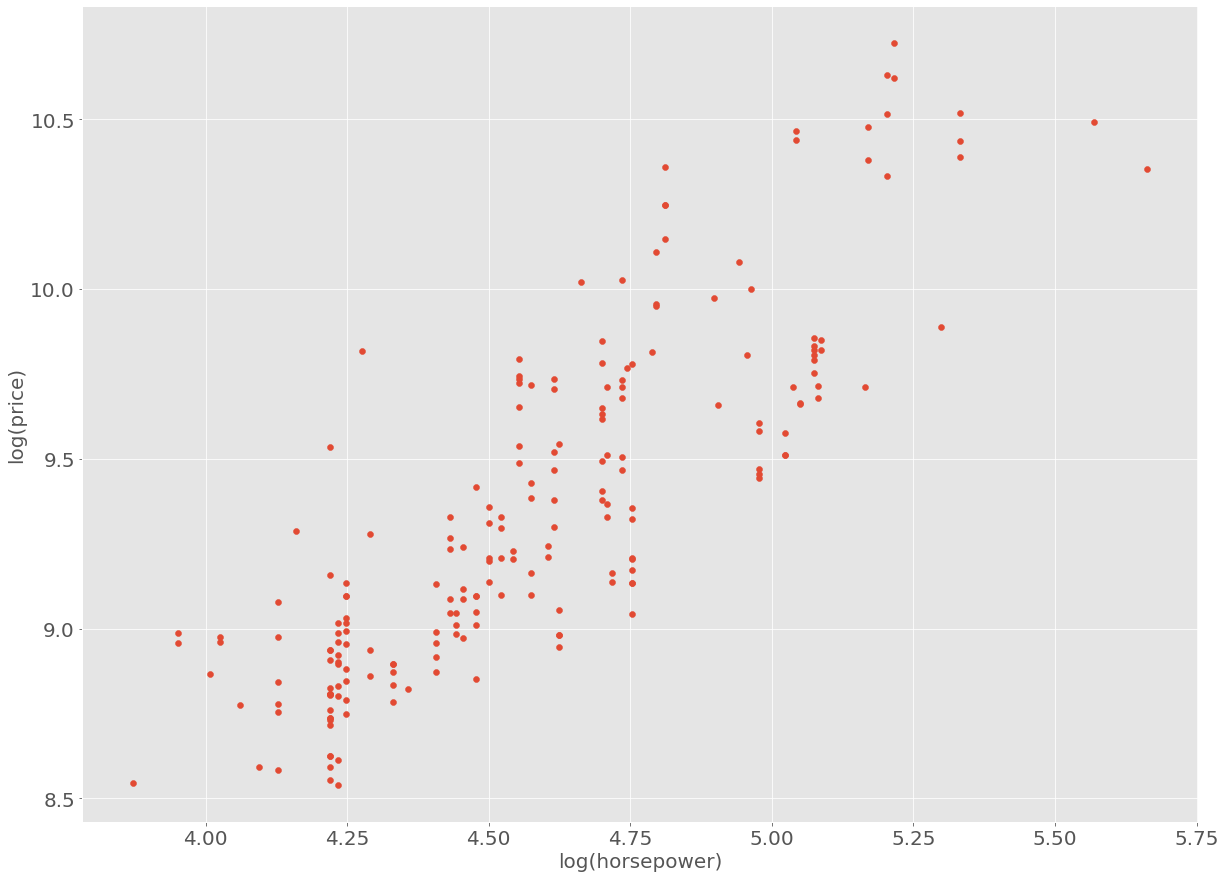

In [7]:
plt.figure()
plt.scatter(np.log(horsepower), np.log(price))
plt.xlabel('log(horsepower)')
plt.ylabel('log(price)')

In [9]:
t = np.log(horsepower)
ones = np.ones(len(t))
b = np.log(price)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

In [10]:
x_hat

array([3.71248321, 1.23103496])

In [11]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

In [12]:
MSE = np.mean((least_square - b)**2)

print('MSE: ', MSE)

MSE:  0.07319547912102349


In [15]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

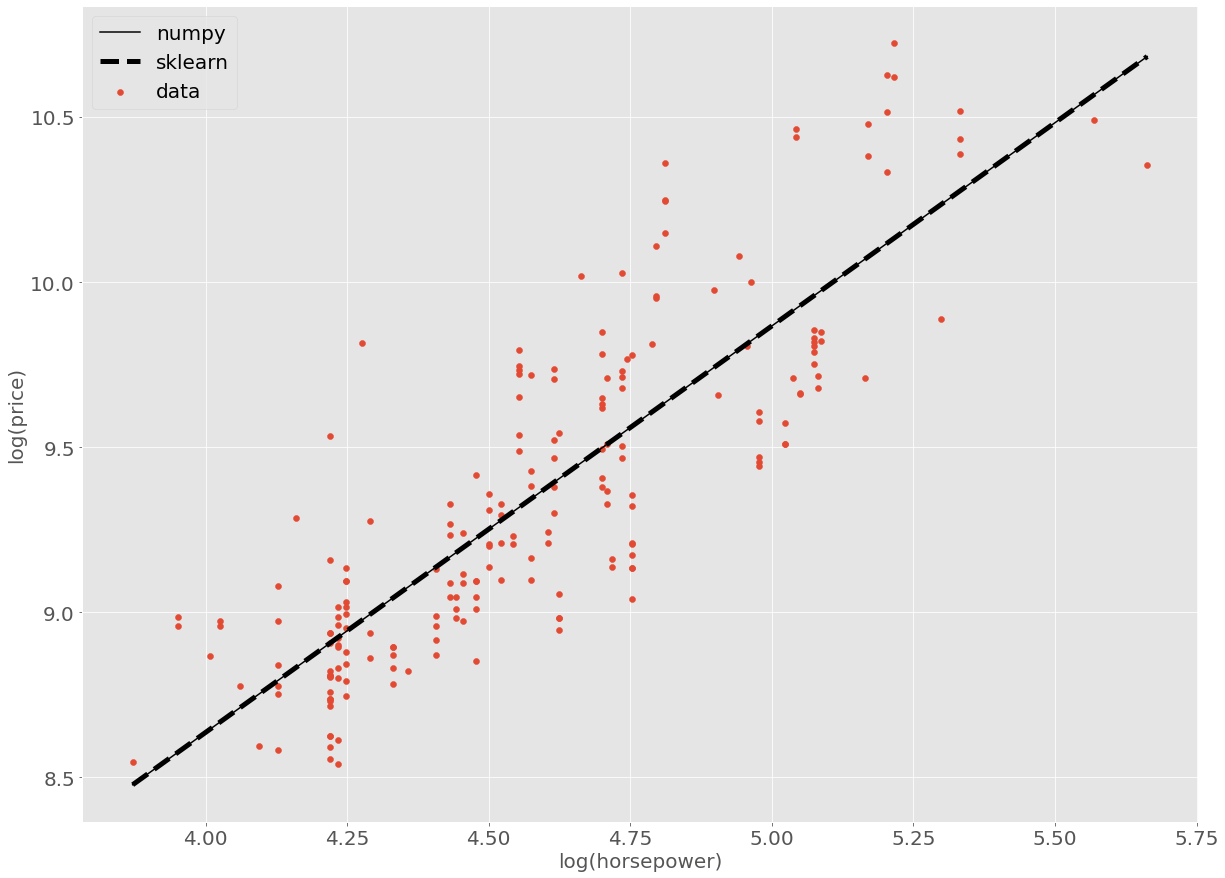

In [16]:
fig, ax = plt.subplots()
plt.scatter(t, b, label='data')
plt.plot(t_linspace, least_square_plot, color='k', label='numpy')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', label='sklearn', linewidth=5)
plt.xlabel('log(horsepower)')
plt.ylabel('log(price)')
plt.legend()

In [18]:
# 2021 Toyota Camry (best seller car in USA) https://cars.usnews.com/cars-trucks/toyota/camry
horsepower_camry = np.log(203)
price_camry = np.log(25045)

estimated = x_hat[0] + x_hat[1] * horsepower_camry

print('Real Price: ', np.exp(price_camry))
print('Estimated Price: ', np.exp(estimated))

Real Price:  25044.99999999999
Estimated Price:  28373.91455971133
